# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen to work with the WHR Dataset
2. I will be predicting the levels of corruption for countries for a given year. The label will be the created target variable `Corruption levels`, which categorizes `Perceptions of corruption` as 'Low', 'Medium', or 'High'.
3. This is a supervised learning problem. It is a classification problem, specifically, a multi-class classification problem.
4. Potential features include:
    Life Ladder,
    Log GDP per capita,
    Social support,
    Healthy life expectancy at birth,
    Freedom to make life choices,
    Generosity,
    Positive affect,
    Negative affect,
    Confidence in national government,
    Democratic Quality,
    Delivery Quality,
    Standard deviation of ladder by country-year,
    Standard deviation/Mean of ladder by country-year,
    GINI index (World Bank estimate),
    GINI index (World Bank estimate) average 2000-15,
    gini of household income reported in Gallup by wp5-year
5. Predicting corruption levels for a given country in a given year is an important problem, as it can help companies assess the corruption risk of potential markets to make informed decisions on where to invest or expand. Having known the perceived corruption level, a company can then anticipate and plan for potential costs associated with corruption, such as bribes or delays.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

First, I will inspect the dataset to see how many rows and columns there are.

In [3]:
df.shape

(1562, 19)

Since there seems to be multiple rows for each country by year, I will check to see how many unique countries there are.

In [4]:
df['country'].nunique()

164

I thought about aggregating the data points for each country. However, this would have resulted into far fewer data points (164). To effectively utilize the dataset without losing valuable information by aggregating, I therefore decided to use the individual rows representing different countries by year. 

Next, I inspect the data types of the columns

In [5]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

I also took a look at the summary statistics for each column just to get some insight on how they are distributed. What stood out to me from this is how the scale varies greatly across the columns, some such as `Healthy life expectancy at birth` are on a much higher scale than, say, `Generosity`. I will therefore perfom standardization at a later stage during data preparation.

In [6]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


I will perform feature selection at this stage. 
Most of the columns will be used as features, however, I will drop the 'Standard deviation of ladder by country-year' and 'Standard deviation/Mean of ladder by country-year' columns, since I believe the relevant information is already captured by the 'Life Ladder' and thus avoid redundancy.
I also believe the 'GINI index (World Bank estimate), average 2000-15' column captures information on inequality, and I will therefore also drop the 'gini of household income reported in Gallup, by wp5-year' and 'GINI index (World Bank estimate)' since that information might be redundant. Additionally, I will rename the `GINI index (World Bank estimate), average 2000-15` to simply `GINI index`.

In [7]:
cols_to_drop = ['Standard deviation of ladder by country-year',
                'Standard deviation/Mean of ladder by country-year',
                'GINI index (World Bank estimate)', 
                'gini of household income reported in Gallup, by wp5-year']

In [8]:
df = df.drop(columns = cols_to_drop)

In [9]:
df.rename(columns={'GINI index (World Bank estimate), average 2000-15': 'GINI index'}, inplace=True)

In [10]:
# confirm that columns were dropped and renamed appropriately
list(df.columns)

['country',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'GINI index']

The above forms the comprehensive feature list, besides 'country' and 'year' columns of course.

Next, I create boxplots and histograms to visualize the distributions of the various features I have selected. From the plots, some features such as social support seem to be heavily skewed, while others such as confidence in national government seem to be roughly normally distributed. 
This will also inform the choice of imputation of missing values when I get to that stage. 

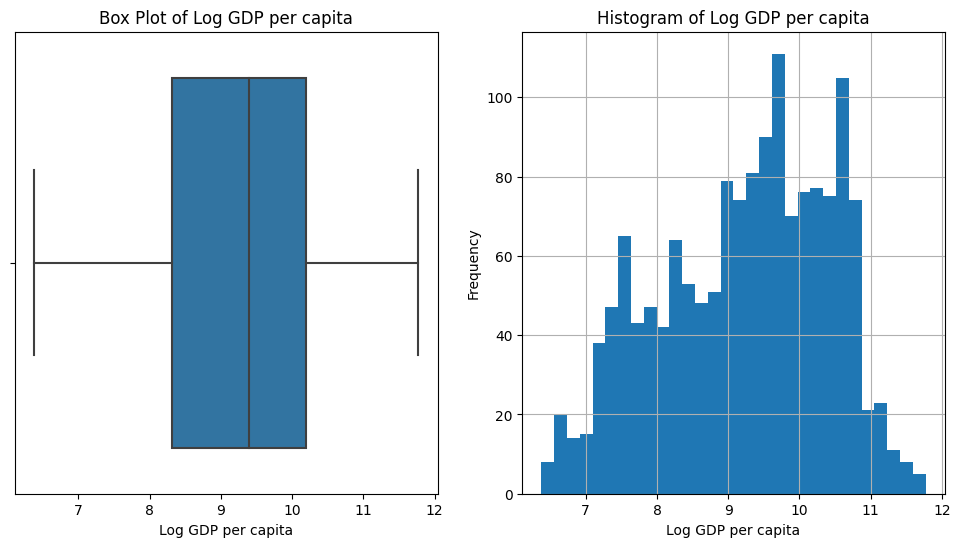

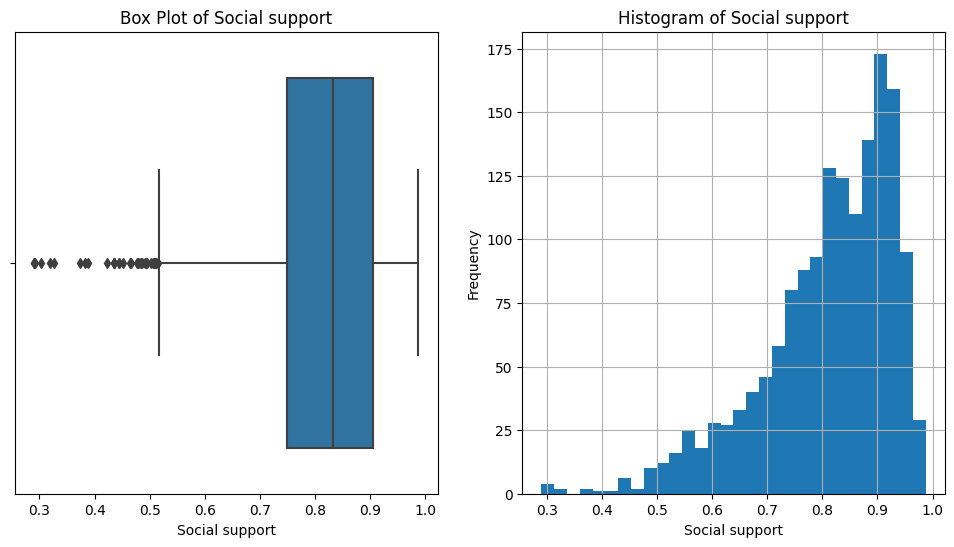

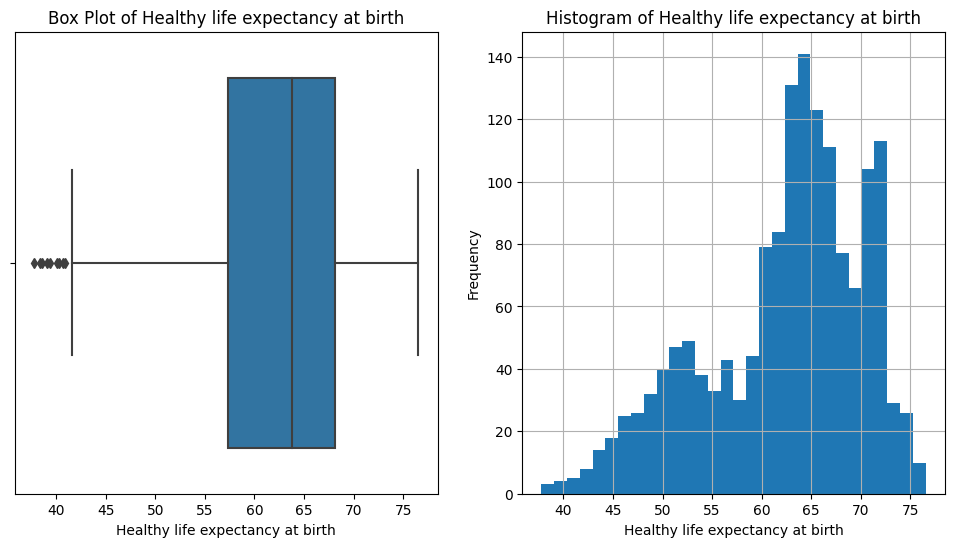

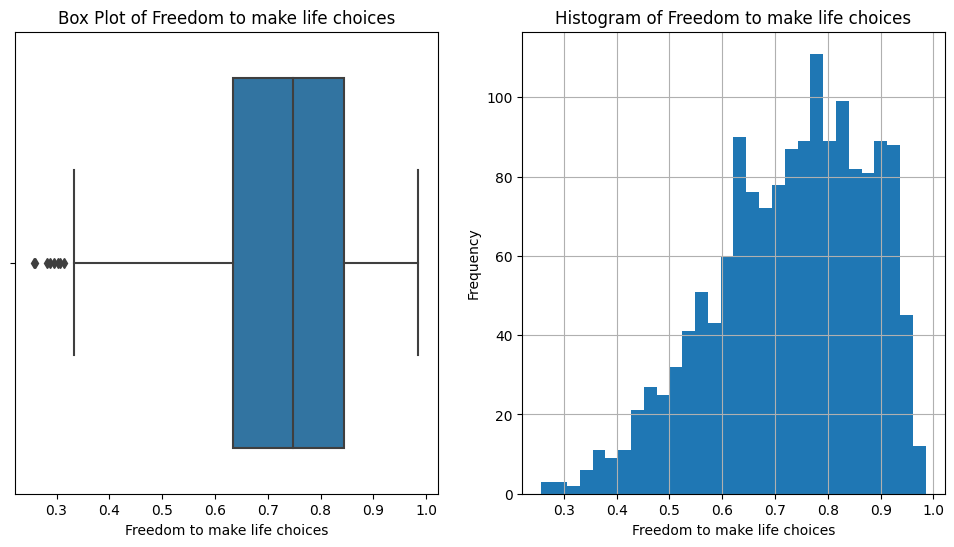

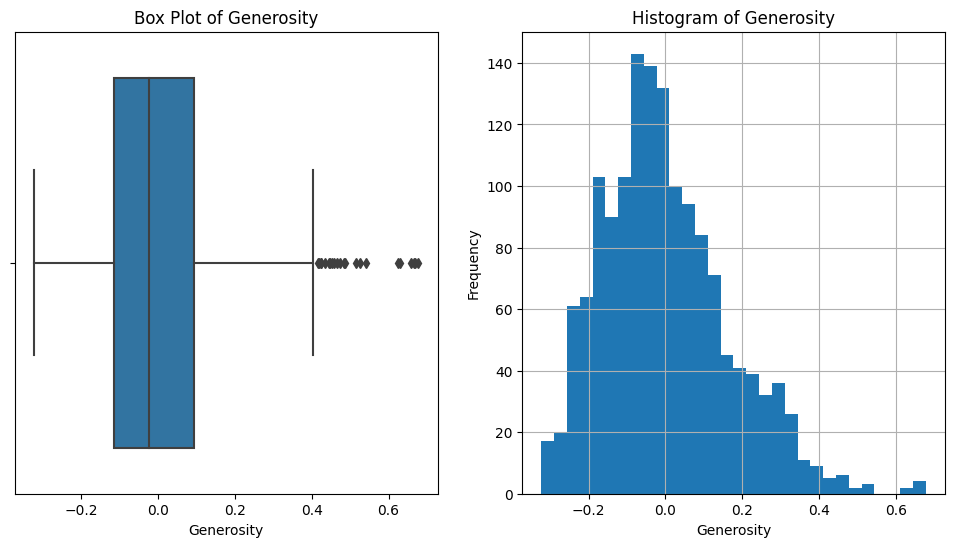

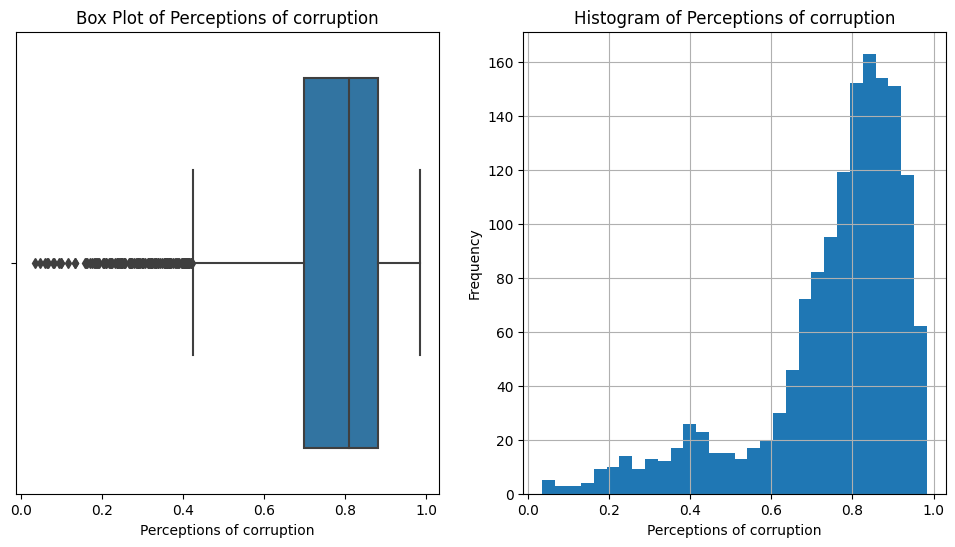

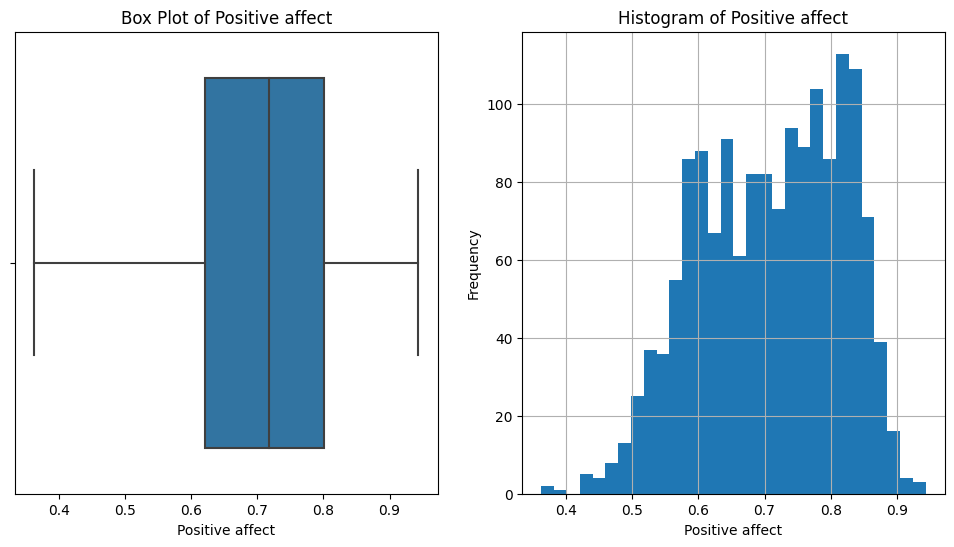

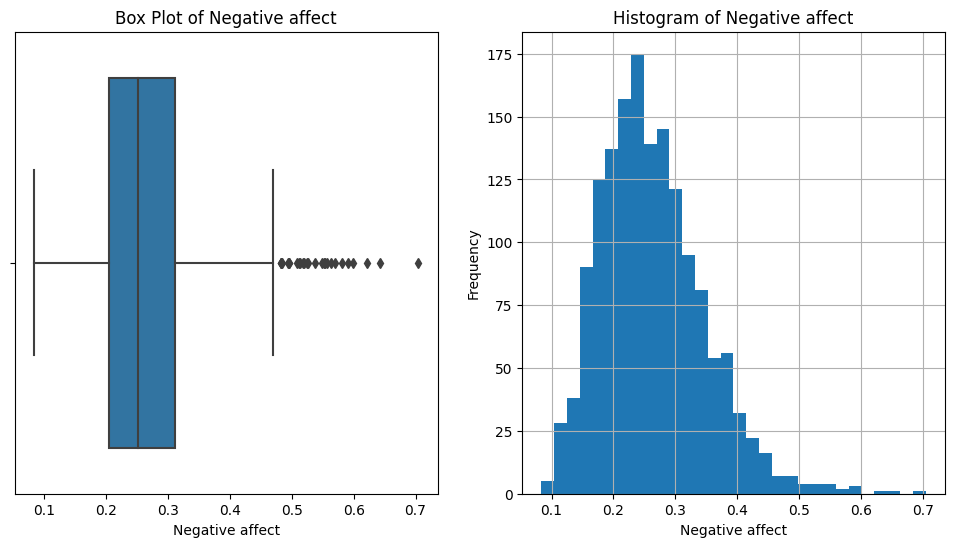

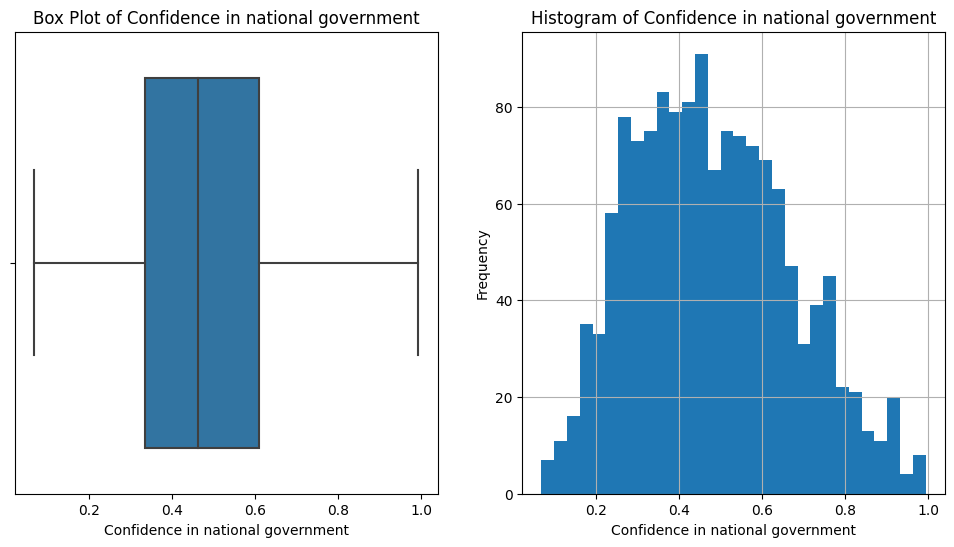

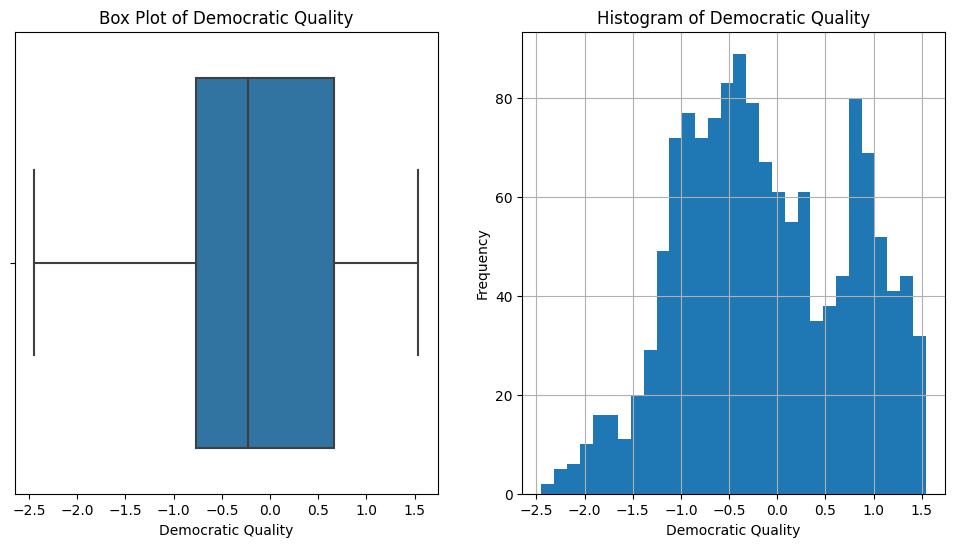

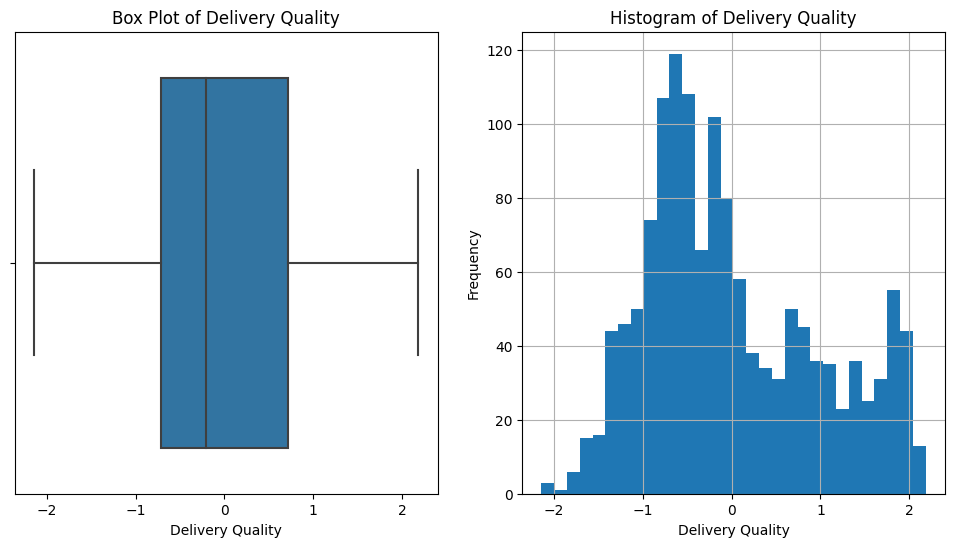

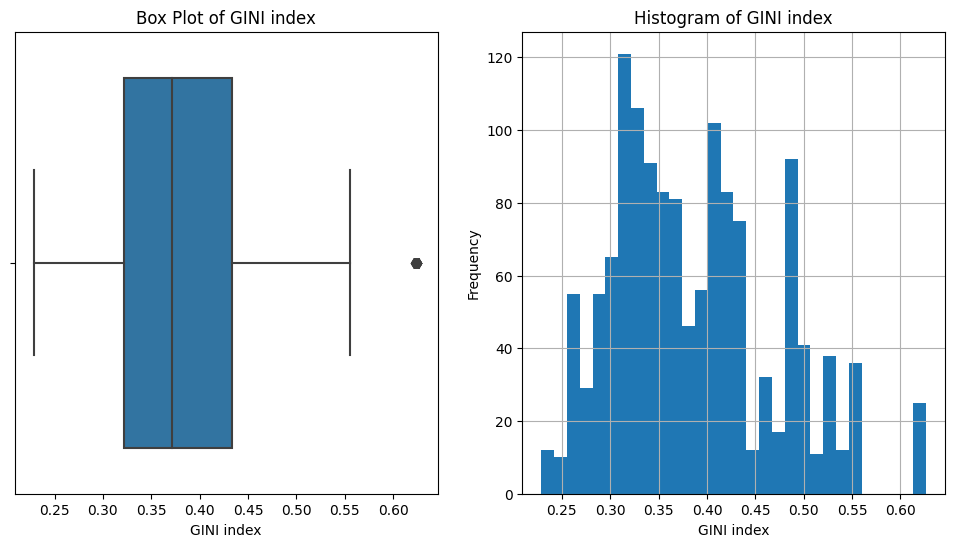

In [11]:
# Features to analyze
features_to_check = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect',
    'Confidence in national government',
    'Democratic Quality',
    'Delivery Quality',
    'GINI index'
]

# Plot box plots and histograms
for feature in features_to_check:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    
    plt.subplot(1, 2, 2)
    df[feature].hist(bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.show()


From the above plots, some columns appear to have really distinct outliers, which I'll handle below: 

In [12]:
outlier_cols = ['Social support', 'Generosity', 'Negative affect',
    'Confidence in national government', 'GINI index']

In [13]:
for col in outlier_cols:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
    

In [14]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI index
count,1562.000000,1562.000000,1535.000000,1562.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1562.000000,1401.000000,1391.000000,1391.000000,1386.000000
mean,2011.820743,5.433676,9.220822,0.812850,62.249887,0.728975,0.000214,0.753622,0.708969,0.265728,0.480486,-0.126617,0.004947,0.387124
std,3.419787,1.121017,1.184035,0.117182,7.960671,0.145408,0.163952,0.185538,0.107644,0.088067,0.190178,0.873259,0.981052,0.083383
min,2005.000000,2.661718,6.377396,0.450662,37.766476,0.257534,-0.293943,0.035198,0.362498,0.114123,0.126142,-2.448228,-2.144974,0.249091
25%,2009.000000,4.606351,8.310665,0.749794,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204680,0.334732,-0.772010,-0.717463,0.321583
50%,2012.000000,5.332600,9.398610,0.833999,63.803192,0.748014,-0.022638,0.808115,0.717398,0.252504,0.463137,-0.225939,-0.210142,0.371000
75%,2015.000000,6.271025,10.190634,0.905294,68.098228,0.843628,0.094649,0.880089,0.800858,0.312924,0.610723,0.665944,0.717996,0.433104
max,2017.000000,8.018934,11.770276,0.982522,76.536362,0.985178,0.677773,0.983276,0.943621,0.599335,0.993604,1.540097,2.184725,0.626000


Check for columns with missing values

In [15]:
df.isnull().sum(axis=0)

country                                0
year                                   0
Life Ladder                            0
Log GDP per capita                    27
Social support                         0
Healthy life expectancy at birth       9
Freedom to make life choices          29
Generosity                            80
Perceptions of corruption             90
Positive affect                       18
Negative affect                        0
Confidence in national government    161
Democratic Quality                   171
Delivery Quality                     171
GINI index                           176
dtype: int64

There seems to be a number of columns with missing values. From the visualization plots previously created, I think median imputation would be more appropriate, as most of the feature variables were skewed. Below, I impute missing values in the feature columns with the SimpleImputer library, and using the median values.

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
# Identify features with missing values
missing_features = df.columns[df.isnull().any()].tolist()
missing_features

['Log GDP per capita',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'GINI index']

In [18]:
# Create the SimpleImputer instance with median strategy
median_imputer = SimpleImputer(strategy='median')

# Fit and transform the data
df_median_imputed = df.copy()
df_median_imputed[missing_features] = median_imputer.fit_transform(df[missing_features])


In [19]:
df_median_imputed.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI index
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,0.371
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.371
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.371
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.371
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.371


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I do have a new feature list. As explained before, I dropped some columns which I thought captured infromation which was already captured by other similar columns to avoid redundancy. The feature list now includes:
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
  and 'GINI index (World Bank estimate), average 2000-15' columns.
The columns that were dropped are:
    Standard deviation of ladder by country-year,              
    Standard deviation/Mean of ladder by country-year,          
    GINI index (World Bank estimate), and                                
    gini of household income reported in Gallup, by wp5-year.
   
3. Since there are no categorical features, no one-hot encoding needs to be performed. I will appropriately standardize the features to ensure they are on the same scale, as well as perfom feature engineering to define the label column, i.e determine thresholds and subsequently categorize the corruption levels as Low, Medium or High based on the `Perceptions of corruption` column.

4. The primary model will be a Gradient Boosting Decision Tree (GBDT)

5. Below is my comprehensive project plan:
   1. Model Building:

        Data Preparation: Standardize the feature columns. Define the label for corruption levels. Feature set is ready.
        
        Training the GBDT Model:
        
        Parameters to Tune:
        Number of boosting stages (n_estimators)
        Learning rate (learning_rate)
        Maximum depth of the trees (max_depth)
        Minimum samples required to split a node (min_samples_split)
        Minimum samples required at a leaf node (min_samples_leaf)
   
    2. Model Evaluation:
    Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC.
    Cross-Validation: Perform K-Fold Cross-Validation (e.g., K=5) to assess model   performance.

    4. Model Improvement:
    Hyperparameter Tuning: Optimize parameters using Grid Search or Random Search.
    Feature Importance: Analyze to understand key features influencing corruption levels.
    Error Analysis: Refine features and address misclassifications.

    4. Model Selection:
    Select Best Model: Based on evaluation metrics, choose the final GBDT model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

####  Data Preparation

First, I will proceed to create a label column, Corruption Level, categorizing corruption levels as Low, Medium or High based on the Perceptions of Corruption column. First, I will inspect the values in this column to determine the thresholds, then go ahead to define the labels based on these thresholds.

In [21]:
# Inspect the values in 'Perceptions of Corruption'
print(df_median_imputed['Perceptions of corruption'].describe())

count    1562.000000
mean        0.756762
std         0.180558
min         0.035198
25%         0.702761
50%         0.808115
75%         0.874675
max         0.983276
Name: Perceptions of corruption, dtype: float64


The values seem to be on a scale of 0-1. I will define the thresholds as follows:

    Low Corruption: Values from 0 to a low threshold. This is encoded as 1.
    Medium Corruption: Values between the low and high thresholds. Encoded as 2.
    High Corruption: Values above the high threshold. Encoded as 3.
    
Percentile-Based Approach:

    Low Threshold (33rd Percentile): This threshold represents the lower third of the data, indicating low corruption.
    High Threshold (66th Percentile): This threshold represents the upper third of the data, indicating high corruption.

Next, I will calculate the thresholds (percentiles)

In [22]:
low_threshold = df_median_imputed['Perceptions of corruption'].quantile(0.33)
high_threshold = df_median_imputed['Perceptions of corruption'].quantile(0.66)

Create labels based on thresholds

In [23]:
#define a function to create labels based on thresholds
def categorize_corruption(value):
    if value <= low_threshold:
        return 1
    elif value <= high_threshold:
        return 2
    else:
        return 3
        
# apply function to column of interest
df_median_imputed['Corruption levels'] = df_median_imputed['Perceptions of corruption'].apply(categorize_corruption)

In [24]:
# verify label column exists
df_median_imputed.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI index,Corruption levels
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,0.371,3
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.371,3
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.371,1
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.371,1
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.371,2


Next, I will scale the numerical data to normalize each column to have zero mean and unit standard deviation using Scikit-learn's StandardScaler

In [25]:
# drop the year column
df = df_median_imputed.drop(columns='year')

In [26]:
# 1. Create a StandardScaler object 
scaler = StandardScaler()

# 2. Extract numerical features from DataFrame df 
df_to_scale = df.select_dtypes(include=['int64', 'float64']).drop(columns='Corruption levels')


# 3. Call the scaler.fit_transform() method to fit the scaler to data_to_scale
# and tranform the data. 
transformed_data = scaler.fit_transform(df_to_scale)


#4. Create new DataFrame df_scaled
df_scaled = pd.DataFrame(transformed_data, columns=df_to_scale.columns, index=df_to_scale.index)


# Inspect df_scaled
df_scaled

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI index
0,-1.525966,-1.751193,-3.091806,-1.644297,-0.077858,1.144323,0.692102,-1.789207,-0.085560,0.740459,-2.174047,-1.763650,-0.181832
1,-0.920796,-1.610515,-2.224106,-1.592033,-0.350153,1.280777,0.516750,-1.169636,-0.325261,0.737533,-2.312825,-1.742032,-0.181832
2,-0.602588,-1.565492,-2.337072,-1.543580,-0.897056,0.867663,-0.276986,-0.848675,0.108993,-0.995654,-2.249403,-1.722796,-0.181832
3,-1.429479,-1.541302,-2.490486,-1.498426,-1.620707,1.103689,-0.142125,-0.912963,0.016431,-0.951083,-2.161103,-1.721767,-0.181832
4,-1.473008,-1.454298,-2.494471,-1.455336,-1.377465,1.553402,0.104475,0.012326,0.024886,-0.240157,-2.068883,-1.493139,-0.181832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,-0.663439,-1.413375,-0.115892,-1.677049,-1.065377,-0.474314,0.410939,0.026352,-0.947765,0.272354,-1.077920,-1.624882,0.593444
1558,-1.114725,-1.415421,-0.401308,-1.538253,-0.606094,-0.281287,0.351552,0.150925,-0.302336,0.485837,-1.028405,-1.579344,0.593444
1559,-1.544168,-1.421131,-0.657732,-1.428069,-0.431409,-0.586188,0.297481,0.056199,-0.986687,0.617989,-0.916574,-1.442956,0.593444
1560,-1.515427,-1.435806,-0.379229,-1.317886,0.025297,-0.402737,-0.183657,0.267032,-0.649407,1.224970,-0.880141,-1.457722,0.593444


In [27]:
df_scaled['Corruption levels'] = df['Corruption levels']

In [28]:
df_scaled.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI index,Corruption levels
0,-1.525966,-1.751193,-3.091806,-1.644297,-0.077858,1.144323,0.692102,-1.789207,-0.085560,0.740459,-2.174047,-1.763650,-0.181832,3
1,-0.920796,-1.610515,-2.224106,-1.592033,-0.350153,1.280777,0.516750,-1.169636,-0.325261,0.737533,-2.312825,-1.742032,-0.181832,3
2,-0.602588,-1.565492,-2.337072,-1.543580,-0.897056,0.867663,-0.276986,-0.848675,0.108993,-0.995654,-2.249403,-1.722796,-0.181832,1
3,-1.429479,-1.541302,-2.490486,-1.498426,-1.620707,1.103689,-0.142125,-0.912963,0.016431,-0.951083,-2.161103,-1.721767,-0.181832,1
4,-1.473008,-1.454298,-2.494471,-1.455336,-1.377465,1.553402,0.104475,0.012326,0.024886,-0.240157,-2.068883,-1.493139,-0.181832,2


### Model Development

#### Step 1: Create Labeled Examples

In [29]:
y = df_scaled['Corruption levels'] 
X = df_scaled.drop(columns = ['Corruption levels', 'Perceptions of corruption'], axis=1)

#### Step 2: Create Training and Test Sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

#### Step 3: Train a GBDT classifier

I will train a GBDT model using the following initial hyperparameters: n_estimators set to 50, and max_depth set to 10.

In [38]:
print('Begin')

# 1. Create the GradientBoostingClassifier model object 
gbdt_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 10)

# 2. Fit the model to the training data 
gbdt_model.fit(X_train, y_train)

print('End')

Begin
End


#### Step 4: Make Predictions on Test Set

In [39]:
# 1. Make predictions on the test data using the predict method 
y_pred = gbdt_model.predict(X_test)


#### Step 5: Evaluation

I will use accuracy as the evaluation metric, since the ROC curve is better suited for binary classification problems, while this is a multiclass classification problem.

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.67


This initial model attains an accuracy 0.67. I believe we can do better, so I'll proceed below to conduct a hyperparameter search, and subsequently train a final model with the best hyperparameter configuration.

#### Step 6: Hyperparameter Search

I'll tune the `n_estimators` and `max_depth` huperparameters of the GBDT model using the `GridSearchCV` function. This will allow me to search over a specified parameter grid and find the combination of parameters that yields the best performance.

In [50]:
# define parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [6, 8, 12]
}

In [56]:
# Initialize the GBDT model
print('Begin')
gbdt = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

print('End')

Begin
Fitting 5 folds for each of 9 candidates, totalling 45 fits
End


In [57]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")


Best parameters found: {'max_depth': 8, 'n_estimators': 150}


In [58]:
# Train the model with the best parameters
best_gbdt = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_gbdt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, n_estimators=150)

In [59]:
# Make predictions on the test set
y_pred = best_gbdt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.72


The final accuracy score for the improved Gradient Boosting Decision Trees (GBDT) model is 0.72, reflecting a some improvement over the initial model. While this improvement is encouraging, I believe there is still room for further enhancement. 

For a company looking to minimize risk, focusing on countries with low to medium corruption levels is advisable. By refining my model and exploring alternative algorithms, I can strive for even more accurate predictions, ensuring better-informed decisions for international operations and investments.